# Boosting 심화 모델
1. Light GBM
2. CatBoost

## LightGBM
- Gradient Boosting 기반의 모델
- 약 분류기의 학습이 수직적으로 확장하는 leaf-wise 알고리즘을 사용

### Tree Growth 종류
1. Level-Wise Growth
  - 뿌리 노드와 가까운 노드부터 데이터를 분할하는 방법
  - 수평 성장
  - Random Forest, XGBoost
  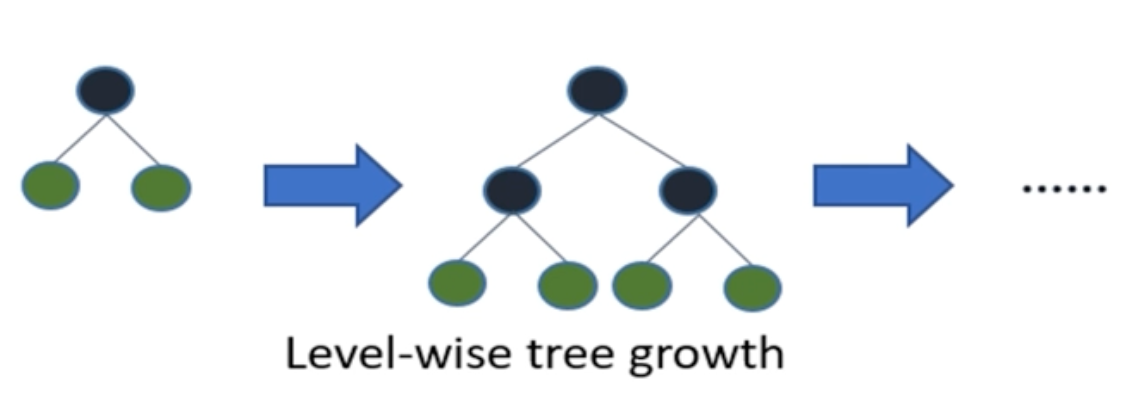
2. Leaf-Wise Growth
  - Loss 변화가 가장 큰 노드부터 데이터를 분할하는 방법  
  - 수직 성장  
  - LightGBM
  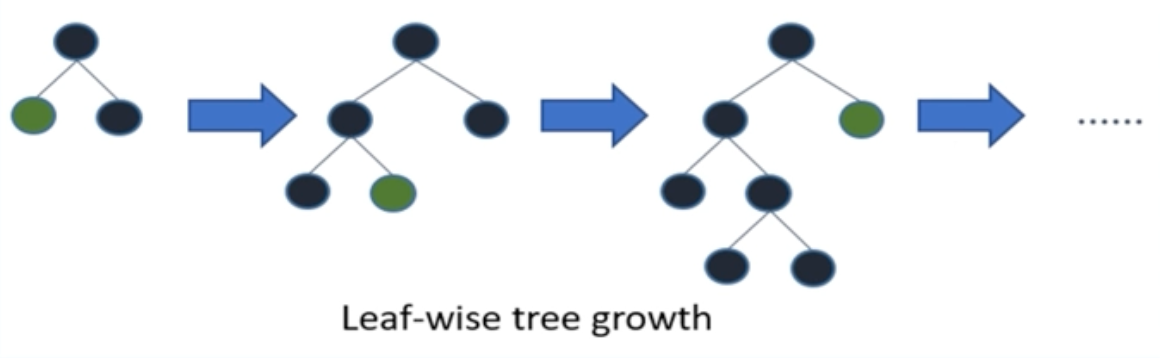

Full tree로 학습할 경우 두 방법 모두 최종 결과물은 같음  
하지만 보통 Full tree만큼 학습시키지 않기 때문에 중간 결과물의 차이가 있음  
> Full Tree: 모든 끝마디에서의 순도가 100%인 상태  

### LightGBM vs XGBoost
LightGBM과 XGBoost는 단순히 노드를 성장시키는 우선순위가 다를뿐 방법은 전반적으로 유사함  

그러나 최근에는 XGBoost보다 LightGBM을 사용하는 경우가 많은데, 이는
- XGBoost에 비해 학습 속도가 빠르고
- 메모리 사용량도 상대적으로 적기 때문


## CatBoost
- Categorical Boosting
- 범주형 변수를 처리하는데 중점을 둔 모델
- 기존 GBM 기반 모델들이 가지고 있는 범주형 변수 처리 문제를 해결

### CatBoost가 범주형 변수를 다루는 방법
1. Ordered Boosting
2. Categorical Feature Combinations

### Ordered Boosting
- 데이터의 일부만 가지고 잔여 오차를 계산한 뒤 모델로 생성
- 모델이 생성된 뒤의 데이터의 잔여 오차는 최초로 생성된 모델로 예측한 값을 사용  

#### Ordered Boosting 방법
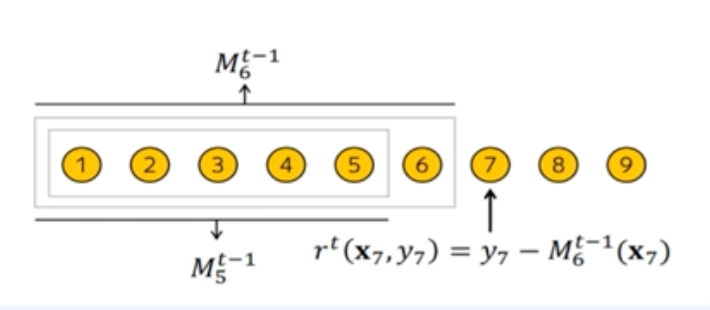

위의 그림과 같은 데이터가 있을 때 Ordered Boosting은 다음과 같은 과정으로 이루어짐  
1. 1\~9까지의 데이터가 있을 때 1\~5 데이터를 이용해 모델을 생성한 뒤 6의 잔여 오차를 이 모델을 사용하여 예측  
2. 1~6 데이터를 이용해 모델을 만들고 7의 잔여 오차를 이 모델을 사용하여 예측

이렇게 학습하는 이유는 과대적합을 막기 위함  

기존의 Boosting 모델은 일괄적으로 모든 학습 데이터를 대상으로 잔여 오차를 계산함  
이에 따라
- 새로운 트리를 만들 때 현재 모델에서 쓰인 데이터의 Gradient를 다시 사용  
- 모델이 과대적합 될 수 있음  

이에 반해 Ordered Boosting을 사용하면 Gradient가 계속 갱신되므로 과대 적합을 방지할 수 있음  

### Categorical Feature Combination
- Information gain(정보 이득)이 동일한 두 변수를 하나의 변수로 묶는 방법  
- 데이터 전처리에 있어 변수 선택의 부담을 줄여줌

예를 들어 다음처럼 출신지에 따라 거주지를 알 수 있는 데이터가 있다고 할 때 두 변수에 대한 Information Gain이 동일하기 때문에 출신지와 거주지를 하나의 변수로 취급할 수 있음  

|출신지|거주지|분류|
|---|---|---|
|서울|서울|0|
|서울|서울|0|
|서울|서울|0|
|부산|부산|1|
|부산|부산|1|
|부산|부산|1|

## 심화 Boosting 알고리즘들의 특징 비교
### XGBoost
- Greedy Algorithm을 사용해 자동 가지치기가 가능해 과대 적합을 방지  

### LGBM
- XGBoost보다 학습 속도가 빠르며 메모리 사용량이 적음
- 적은 데이터(1만건 이하)에서는 과대 적합이 발생할 수 있음  

### CatBoost
- 범주형 데이터가 많을 때 따로 전처리를 하지 않아도 되며 좋은 성능을 냄

## Stacking
- Meta Modeling
- 다른 모델들의 단점은 극복하고 장점은 취할 수 있는 조합 방법을 찾는 방법  

### Stacking 방법  
1. 학습 데이터를 이용해 Sub Model들을 생성  
  - 예측값이 중복되지 않기 위해서 서로 다른 모델을 학습  
  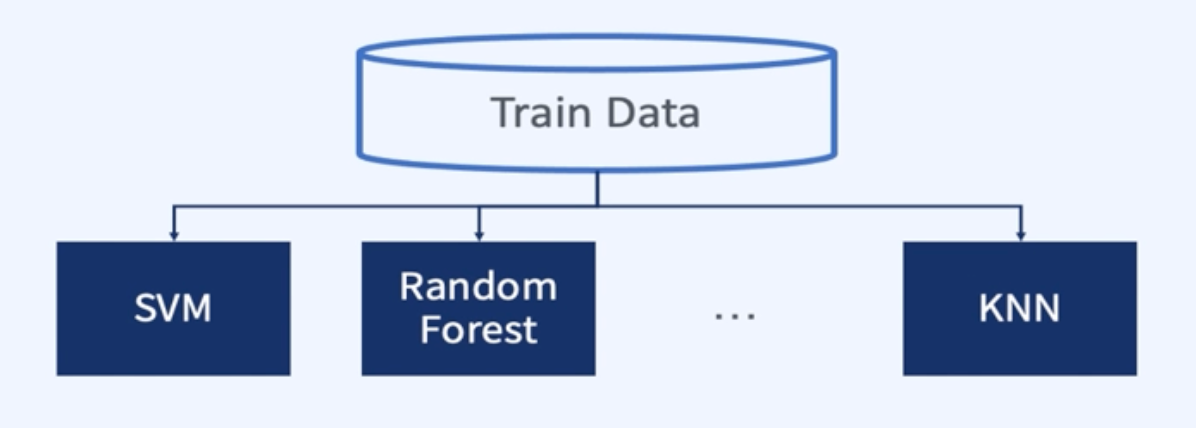
  - 자주 사용하는 Sub Model
    1. SVM
    2. Random Forest
    3. KNN
2. Sub Model들의 예측값을 데이터로 Meta Model을 생성
  - 주로 Regression 모델을 학습  
  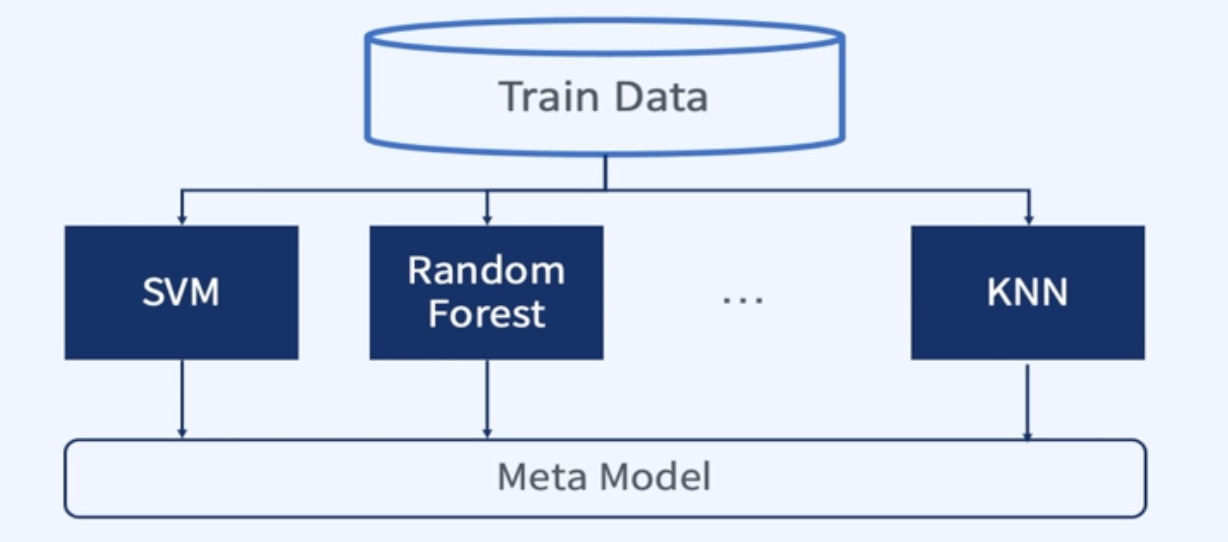

### Stacking Regression
- Sub Model들의 학습 데이터에 대한 예측값으로 Linear Regression을 학습  
- 예측에 사용할 경우 Sub Model들의 예측을 먼저 진행 후 그 값을 Meta Model로 예측

Stacking Classification
- 분류의 경우 Sub Model의 예측 결과값으로는 `Class` 혹은 `확률`이 도출될 수 있음
- 확률값을 이용해 Logistic Regression을 학습 가능

### Stacking Multi-class Classification
- Multi class의 경우 확률 값이 (P(Y=a)m P(Y=b), P(Y=c))로 표시됨  
  - 예측값의 shape이 (N, number of classes)가 됨  
- K개의 Sub-Model이 있을 경우의 Shape
  - (N, K, number of classes)
- 이 값을 다음과 같이 Reshape함  
   - (N, K*number of classes)
- Reshape된 데이터로 Logistic Regression 학습